### Solve numerically the Lane-Emden equation

In [2]:
import numpy as np
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import cmath
%matplotlib inline

In [3]:
def df(x,e,n): #x=[theta,y]  ;  e=epsilon
    d = np.empty(2)
    d[0] = x[1] #d[0] = dtheta/depsilon
    d[1] = -np.power(x[0],n)-2./e*x[1] #d[1] = dY/depsilon
    return d

The adimensional radius for n=0   is  2.449
The adimensional radius for n=0.5 is  2.752
The adimensional radius for n=1   is  3.141
The adimensional radius for n=1.5 is  3.621
The adimensional radius for n=2   is  4.353
The adimensional radius for n=2.5 is  5.290
The adimensional radius for n=3   is  6.897
The adimensional radius for n=3.5 is  9.435


C:\Users\Oriol\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.
C:\Users\Oriol\Anaconda2\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Oriol\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


(0, 6)

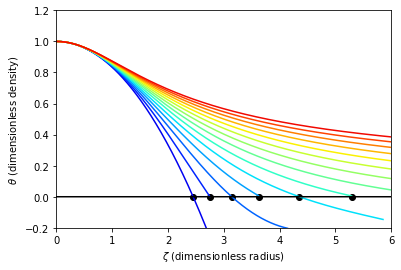

In [4]:
theta0=np.array([1.,0.])
e = np.linspace(1e-7,10,10**5)
nvec = np.arange(0,7,0.5)
color = plt.cm.jet(np.linspace(0.1,0.9,len(nvec))) # To use another colormap, choose from all the options 
                                                   # in https://matplotlib.org/users/colormaps.html
plt.figure(1)
for j,n in enumerate(nvec):
    lm = odeint(df, theta0, e, args=(n,))
    sign = lm[1:,0]*lm[:-1,0]
    zeropos = np.where(sign<0)[0]
    if len(zeropos)>0:
        zero = (e[zeropos[0]-1]+e[zeropos[0]])/2
        plt.plot(zero,0,'ko')
        print 'The adimensional radius for n=%.1g   is  %.3f' %(n,zero)
        endplot = zeropos[0]+5000*int(n+1)
        plt.plot(e[:endplot], lm[:endplot,0],color=color[j])
    else:
        boolean = np.isnan(lm[:,0])
        sign = boolean[1:]+boolean[:-1]
        zeropos = np.where(sign)[0]
        if len(zeropos)>0:
            zero = (e[zeropos[0]-1]+e[zeropos[0]])/2
            plt.plot(zero,0,'ko')
            print 'The adimensional radius for n=%.1f is  %.3f' %(n,zero)
            plt.plot(e[:zeropos[0]+1], lm[:zeropos[0]+1,0],color=color[j])
        else:
            plt.plot(e, lm[:,0],color=color[j])

plt.plot(e,np.zeros(len(e)),'k')
plt.xlabel(r"$\zeta$ (dimensionless radius)")
plt.ylabel(r"$\theta$ (dimensionless density)")
plt.ylim([-0.2,1.2])
plt.xlim([0,6])